# ASIDE Experimental Results Visualization
This notebook generates the key figures presented in the ASIDE paper, comparing instruction-data separation performance and safety robustness across different architectural approaches.
## Overview
The notebook produces visualizations comparing four main approaches:

**Base**: Pretrained models without instruction tuning  
**Vanilla PT**: Standard instruction-tuned models (baseline)  
**ISE**: ISE baseline method with learnable segment embeddings  
**ASIDE (ours)**: Main contribution with π/2 orthogonal rotation

In [30]:
import zipfile
import re
import numpy as np

zip_path = 'train_logs.zip'
target_dir = 'train_logs/llama_3.1_8b/SFTv110/'  # Note the trailing slash!

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # List all files under the target directory
    files_in_dir = [f for f in zip_ref.namelist() if f.startswith(target_dir) and not f.endswith('/')]
    
    forward_rot_train_loss = [np.empty((0, 2)) for i in range(len(files_in_dir))]
    ind = 0

    for f in files_in_dir:
        if 'forward_rot' in f.lower() and 'losses.log' in f.lower():

            with zip_ref.open(f) as file:
                content = file.read().decode('utf-8')

                for line in content.split('\n'):
                    
                    match = re.search(r"Step (\d+): Train Loss = ([\d\.]+)", line)

                    if match:
                        step = int(match.group(1))
                        loss = float(match.group(2))
                        forward_rot_train_loss[ind] = np.vstack((forward_rot_train_loss[ind], np.array([step, loss])))
            ind += 1


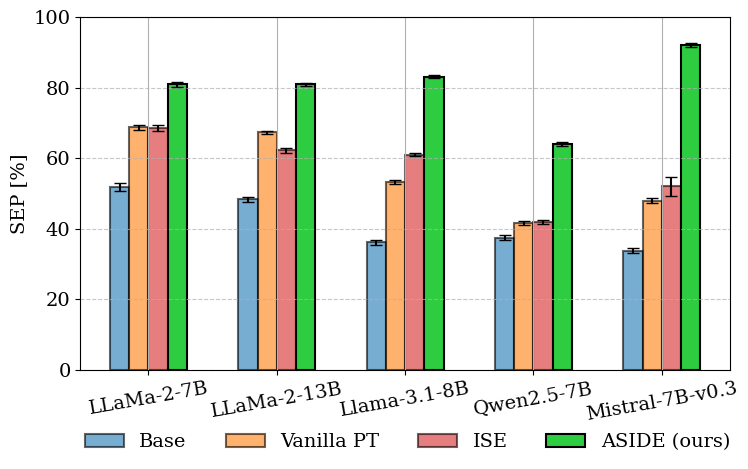

In [33]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14  # Global font size



# Mean SEP [%] values
means = {
    "LLaMa-2-7B":     [51.9, 68.7, 68.5, 81.0],
    "LLaMa-2-13B":    [48.3, 67.3, 62.2, 80.9],
    "Llama-3.1-8B":   [36.2, 53.2, 61.0, 83.1],
    "Qwen2.5-7B":     [37.5, 41.6, 41.9, 64.1],
    "Mistral-7B-v0.3":[33.7, 48.0, 52.1, 92.1]
}

# Standard deviations (± values)
errors = {
    "LLaMa-2-7B":     [1.1, 0.8, 0.8, 0.7],
    "LLaMa-2-13B":    [0.6, 0.5, 0.6, 0.5],
    "Llama-3.1-8B":   [0.7, 0.6, 0.5, 0.5],
    "Qwen2.5-7B":     [0.6, 0.6, 0.6, 0.6],
    "Mistral-7B-v0.3":[0.7, 0.6, 2.7, 0.6]
}

method_colors = {
    'Base': '#1f77b4',
    'Vanilla PT': '#ff7f0e',
    'ISE': '#d62728',
    'ASIDE (ours)': '#2ecc40'
}

alphas = [0.6, 0.6, 0.6, 1]
models = list(means.keys())
methods = ['Base', 'Vanilla PT', 'ISE', 'ASIDE (ours)']
x = np.arange(len(models))  # positions for the groups
bar_width = 0.15

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))

for i, method in enumerate(methods):
    values = [means[model][i] for model in models]
    errs = [errors[model][i] for model in models]
    ax.bar(x + i * bar_width, values, bar_width, yerr=errs,
           label=method, capsize=4, 
           color=method_colors[method], alpha=alphas[i],
                      linewidth=1.5,
           edgecolor='black')

# Labels and styling
ax.set_ylabel('SEP [%]')
ax.set_xticks(x + bar_width * 1.5)
ax.set_xticklabels(models, rotation=10)
ax.legend(title='Method')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(top=100)
ax.legend( bbox_to_anchor=(-0.02, -0.28), loc='lower left', ncol=4, fontsize=14, frameon=False)

plt.tight_layout()
plt.savefig('plots/sep_Apr_17.pdf', bbox_inches='tight')


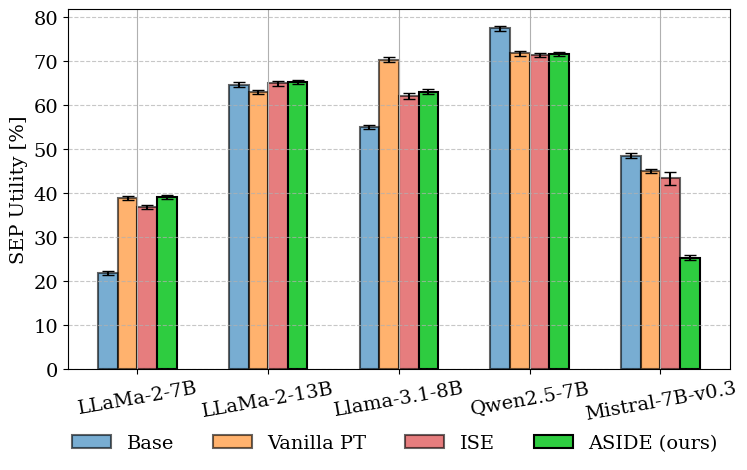

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Mean SEP Utility [%] values
means_utility = {
    "LLaMa-2-7B":     [21.8, 38.8, 36.8, 39.1],
    "LLaMa-2-13B":    [64.6, 63.0, 64.9, 65.2],
    "Llama-3.1-8B":   [55.0, 70.3, 62.0, 63.0],
    "Qwen2.5-7B":     [77.4, 71.7, 71.3, 71.6],
    "Mistral-7B-v0.3":[48.5, 45.0, 43.3, 25.3]
}

# Standard deviations (± values)
errors_utility = {
    "LLaMa-2-7B":     [0.4, 0.5, 0.5, 0.5],
    "LLaMa-2-13B":    [0.5, 0.5, 0.6, 0.5],
    "Llama-3.1-8B":   [0.5, 0.5, 0.6, 0.6],
    "Qwen2.5-7B":     [0.5, 0.5, 0.5, 0.5],
    "Mistral-7B-v0.3":[0.5, 0.5, 1.5, 0.5]
}

# Custom highlight color scheme (ASIDE stands out)

alphas = [0.6, 0.6, 0.6, 1]

# Setup
models = list(means_utility.keys())
methods = ['Base', 'Vanilla PT', 'ISE', 'ASIDE (ours)']
x = np.arange(len(models))
bar_width = 0.15

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

for i, method in enumerate(methods):
    values = [means_utility[model][i] for model in models]
    errs = [errors_utility[model][i] for model in models]
    ax.bar(x + i * bar_width, values, bar_width,
           yerr=errs, capsize=4, edgecolor='black',
           label=method, color=method_colors[method],
                      linewidth=1.5,
           alpha=alphas[i])

# Labels and formatting
ax.set_ylabel('SEP Utility [%]')
ax.set_xticks(x + bar_width * 1.5)
ax.set_xticklabels(models, rotation=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Legend outside
ax.legend( bbox_to_anchor=(-0.02, -0.28), loc='lower left', ncol=4, fontsize=14, frameon=False)

plt.tight_layout()
plt.savefig('plots/sep_utility_Apr_17.pdf')


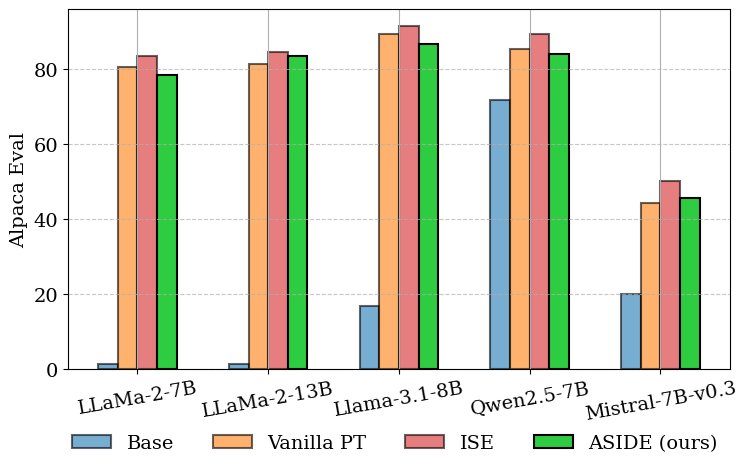

In [35]:
alpaca_eval_scores = {
    "LLaMa-2-7B":      [1.2, 80.3, 83.3, 78.2],
    "LLaMa-2-13B":     [1.2, 81.3, 84.3, 83.4],
    "Llama-3.1-8B":    [16.8, 89.3, 91.3, 86.6],
    "Qwen2.5-7B":      [71.6, 85.3, 89.1, 83.9],
    "Mistral-7B-v0.3": [20.0, 44.3, 50.08, 45.4]
}

# Custom highlight color scheme (ASIDE stands out)

alphas = [0.6, 0.6, 0.6, 1]

# Setup
models = list(alpaca_eval_scores.keys())
methods = ['Base', 'Vanilla PT', 'ISE', 'ASIDE (ours)']
x = np.arange(len(models))
bar_width = 0.15

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

for i, method in enumerate(methods):
    values = [alpaca_eval_scores[model][i] for model in models]
    ax.bar(x + i * bar_width, values, bar_width,
           capsize=4, edgecolor='black',
           label=method, color=method_colors[method],
           linewidth=1.5,
           alpha=alphas[i])

# Labels and formatting
ax.set_ylabel('Alpaca Eval')
ax.set_xticks(x + bar_width * 1.5)
ax.set_xticklabels(models, rotation=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Legend outside
ax.legend( bbox_to_anchor=(-0.02, -0.28), loc='lower left', ncol=4, fontsize=14, frameon=False)

plt.tight_layout()
plt.savefig('plots/alpaca_eval_Apr_17.pdf', bbox_inches='tight')


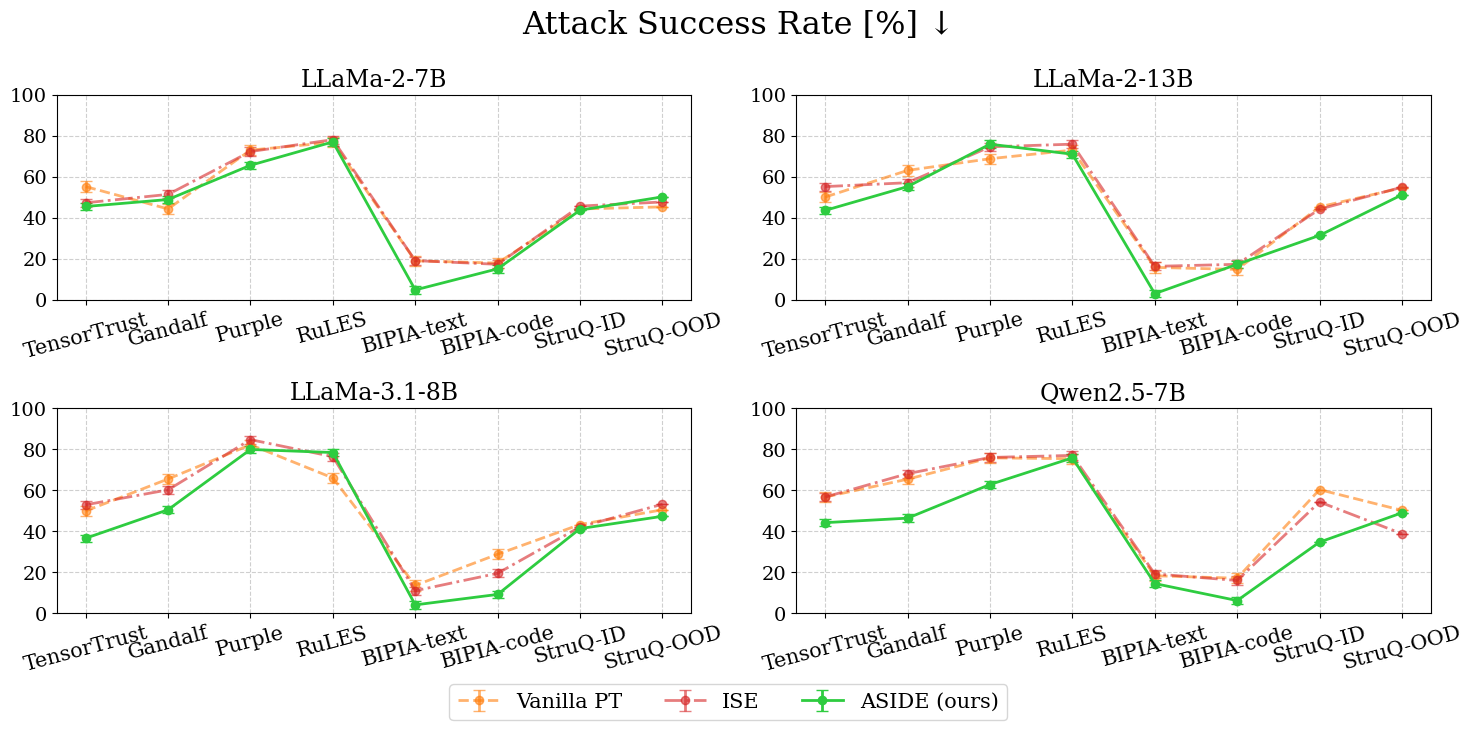

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Models and attack types
models = [  "LLaMa-2-7B", "LLaMa-2-13B", "LLaMa-3.1-8B", "Qwen2.5-7B"]
attacks = ["TensorTrust", "Gandalf", "Purple", "RuLES", "BIPIA-text", "BIPIA-code", "StruQ-ID", "StruQ-OOD"]
methods = ["Vanilla PT", "ISE", "ASIDE (ours)"]

# Line styles and colors
linestyles = ['--', '-.', '-']

# Mean Attack Success Rate values [method][model][attack]
asr_means = {
    "Vanilla PT": np.array([
        [55.2, 44.3, 73.0, 76.8, 19.0, 17.9, 44.3, 45.3],
        [50.1, 63.1, 68.8, 73.0, 15.8, 14.8, 45.3, 54.6],
        [49.9, 65.5, 82.2, 66.0, 13.6, 28.8, 43.3, 50.5],
        [56.7, 65.4, 75.8, 75.4, 18.3, 17.1, 60.3, 50.2],
    ]),
    "ISE": np.array([
        [47.3, 51.4, 72.3, 78.1, 19.1, 17.3, 45.7, 47.7],
        [55.2, 57.1, 74.6, 75.9, 16.3, 17.3, 44.2, 54.9],
        [52.9, 60.2, 84.7, 76.4, 11.0, 19.5, 42.1, 53.2],
        [56.7, 68.1, 76.0, 77.0, 19.2, 16.0, 54.3, 38.8],
    ]),
    "ASIDE (ours)": np.array([
        [45.5, 48.9, 65.6, 77.0, 4.8, 15.1, 43.7, 50.2],
        [43.6, 55.2, 75.9, 71.0, 3.0, 17.3, 31.4, 51.2],
        [36.6, 50.5, 79.9, 78.4, 4.1, 9.2, 41.3, 47.3],
        [44.2, 46.4, 62.8, 75.8, 14.5, 6.2, 34.7, 49.0],
    ])
}


# Simulated standard deviations [method][model][attack]
# You can replace these with your actual error values
asr_stds = {
    "Vanilla PT": np.hstack((np.full((4, 6), 2.5), np.zeros((4, 2)))),
    "ISE": np.hstack(( np.full((4, 6), 2.0), np.zeros((4, 2)))),
    "ASIDE (ours)": np.hstack(( np.full((4, 6), 1.8), np.zeros((4, 2)),)),
}

method_colors = {
    'Base': '#1f77b4',
    'SFT': '#ff7f0e',
    'Vanilla PT':  '#ff7f0e',
    'ISE': '#d62728',
    'ASIDE (ours)': '#2ecc40'
}

# Create subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
axes = axes.flatten()

# Plot each model panel
for idx, model in enumerate(models):
    ax = axes[idx]
    for m_idx, method in enumerate(methods):
        y = asr_means[method][idx]
        yerr = asr_stds[method][idx]
        ax.errorbar(
            attacks,
            y,
            yerr=yerr,
            label=method,
            color=method_colors[method],
            linestyle=linestyles[m_idx],
            marker='o',
            capsize=4,
            linewidth=2,
            markersize=6,
            alpha=alphas[m_idx+1],
        )
    
    ax.set_title(f"{model}", fontsize=17)
    # ax.set_ylabel("Attack Success Rate [%]", fontsize=12)
    ax.set_ylim(0, 100)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.tick_params(axis='x', rotation=15)
    ax.set_xticks(range(len(attacks)))
    ax.set_xticklabels(attacks, fontsize=15)

# Shared legend and layout
fig.suptitle("Attack Success Rate [%] ↓", fontsize=23)
fig.legend(methods, bbox_to_anchor=(0.3, -0.05), loc='lower left', ncol=3, fontsize=15, frameon=True)
fig.tight_layout()
plt.savefig('plots/safety_evals_Apr_21.pdf', bbox_inches="tight")

[49.9 65.5 82.2 66.  13.6 28.8 43.3 50.5]
[52.9 60.2 84.7 76.4 11.  19.5 42.1 53.2]
[36.6 50.5 79.9 78.4  4.1  9.2 41.3 47.3]
[28.2 47.9 64.4 70.9 11.1 13.7 33.4 24.3]
[49.7 48.6 86.7 77.9  3.7 12.5 50.4 55.8]
[27.  36.4 63.5 65.1  0.5  3.2  9.6 10.8]


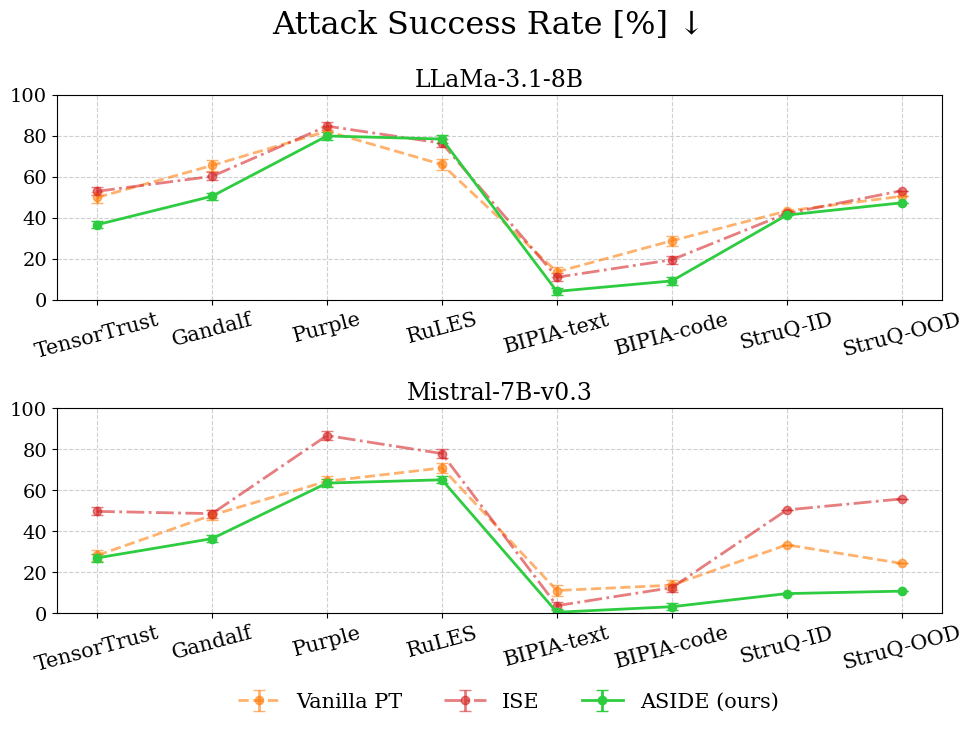

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Models and attack types
models = [  "LLaMa-2-7B", "LLaMa-2-13B", "LLaMa-3.1-8B", "Qwen2.5-7B", "Mistral-7B-v0.3"]
attacks = ["TensorTrust", "Gandalf", "Purple", "RuLES", "BIPIA-text", "BIPIA-code", "StruQ-ID", "StruQ-OOD"]
methods = ["Vanilla PT", "ISE", "ASIDE (ours)"]

# Line styles and colors
linestyles = ['--', '-.', '-']

# Mean Attack Success Rate values [method][model][attack]
asr_means = {
    "Vanilla PT": np.array([
        [55.2, 44.3, 73.0, 76.8, 19.0, 17.9, 44.3, 45.3],
        [50.1, 63.1, 68.8, 73.0, 15.8, 14.8, 45.3, 54.6],
        [49.9, 65.5, 82.2, 66.0, 13.6, 28.8, 43.3, 50.5],
        [56.7, 65.4, 75.8, 75.4, 18.3, 17.1, 60.3, 50.2],
        [28.2,47.9,64.4,70.9,11.1,13.7, 33.4, 24.3],
    ]),
    "ISE": np.array([
        [47.3, 51.4, 72.3, 78.1, 19.1, 17.3, 45.7, 47.7],
        [55.2, 57.1, 74.6, 75.9, 16.3, 17.3, 44.2, 54.9],
        [52.9, 60.2, 84.7, 76.4, 11.0, 19.5, 42.1, 53.2],
        [56.7, 68.1, 76.0, 77.0, 19.2, 16.0, 54.3, 38.8],
        [49.7,48.6,86.7,77.9,3.7,12.5, 50.4, 55.8],
    ]),
    "ASIDE (ours)": np.array([
        [45.5, 48.9, 65.6, 77.0, 4.8, 15.1, 43.7, 50.2],
        [43.6, 55.2, 75.9, 71.0, 3.0, 17.3, 31.4, 51.2],
        [36.6, 50.5, 79.9, 78.4, 4.1, 9.2, 41.3, 47.3],
        [44.2, 46.4, 62.8, 75.8, 14.5, 6.2, 34.7, 49.0],
        [27.0, 36.4, 63.5, 65.1, 0.5,3.2, 9.6,10.8]
    ])
}


# Simulated standard deviations [method][model][attack]
# You can replace these with your actual error values
asr_stds = {
    "Vanilla PT": np.hstack((np.full((5, 6), 2.5), np.zeros((5, 2)))),
    "ISE": np.hstack(( np.full((5, 6), 2.0), np.zeros((5, 2)))),
    "ASIDE (ours)": np.hstack(( np.full((5, 6), 1.8), np.zeros((5, 2)),)),
}

method_colors = {
    'Base': '#1f77b4',
    'SFT': '#ff7f0e',
    'Vanilla PT':  '#ff7f0e',
    'ISE': '#d62728',
    'ASIDE (ours)': '#2ecc40'
}

# Create subplots (2x2)
fig, axes = plt.subplots(2, 1, figsize=(10, 7))
axes = axes.flatten()

# Plot each model panel
for idx, model in enumerate(models):
    if idx == 2 or idx == 4:
        local_idx = 0 if idx == 2 else 1
        ax = axes[local_idx]
        for m_idx, method in enumerate(methods):
            y = asr_means[method][idx]
            print(y)
            yerr = asr_stds[method][idx]
            ax.errorbar(
                attacks,
                y,
                yerr=yerr,
                label=method,
                color=method_colors[method],
                linestyle=linestyles[m_idx],
                marker='o',
                capsize=4,
                linewidth=2,
                markersize=6,
                alpha=alphas[m_idx+1],
            )
    
        ax.set_title(f"{model}", fontsize=17)
        # ax.set_ylabel("Attack Success Rate [%]", fontsize=12)
        ax.set_ylim(0, 100)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.tick_params(axis='x', rotation=15)
        ax.set_xticks(range(len(attacks)))
        ax.set_xticklabels(attacks, fontsize=15)

# Shared legend and layout
fig.suptitle("Attack Success Rate [%] ↓", fontsize=23)
fig.legend(methods, bbox_to_anchor=(0.23, -0.05), loc='lower left', ncol=3, fontsize=15, frameon=False)
fig.tight_layout()
plt.savefig('plots/safety_evals_Apr_21.pdf', bbox_inches="tight")